In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print(f"Форма тренировочных данных: {x_train.shape}, метки: {y_train.shape}")
print(f"Форма тестовых данных: {x_test.shape}, метки: {y_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Форма тренировочных данных: (60000, 28, 28), метки: (60000,)
Форма тестовых данных: (10000, 28, 28), метки: (10000,)


In [5]:
num_pixels = x_train.shape[1] * x_train.shape[2]
df_train = pd.DataFrame(x_train.reshape(-1, num_pixels))

df_train['label'] = y_train

print(df_train.head())

   0  1  2  3  4  5  6  7  8  9  ...  775  776  777  778  779  780  781  782  \
0  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
1  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
2  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
3  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
4  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   

   783  label  
0    0      5  
1    0      0  
2    0      4  
3    0      1  
4    0      9  

[5 rows x 785 columns]


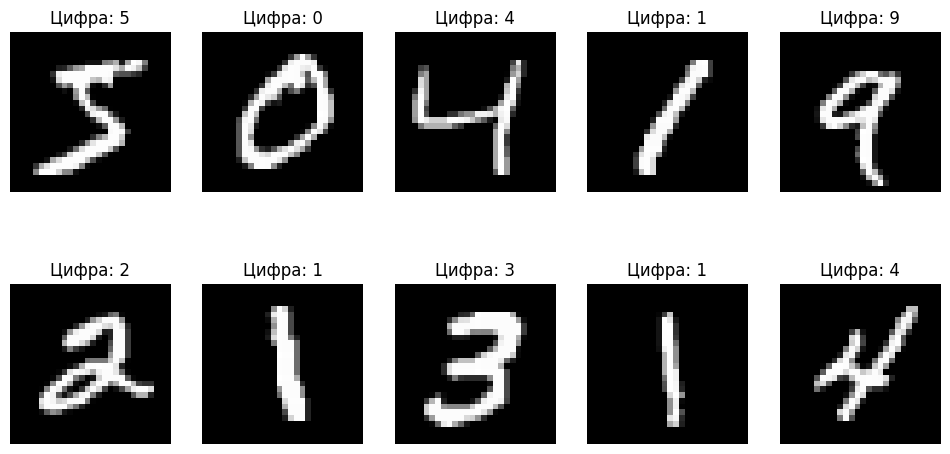

In [6]:
plt.figure(figsize=(12, 6))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap="gray")
    plt.axis("off")
    plt.title(f"Цифра: {y_train[i]}")

plt.show()

In [7]:
print(df_train["label"].value_counts())

label
1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: count, dtype: int64


In [8]:
print(df_train.describe())

             0        1        2        3        4        5        6        7  \
count  60000.0  60000.0  60000.0  60000.0  60000.0  60000.0  60000.0  60000.0   
mean       0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
std        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
25%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
50%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
75%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
max        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

             8        9  ...           775           776           777  \
count  60000.0  60000.0  ...  60000.000000  60000.000000  60000.000000   
mean       0.0      0.0  ...      0.088867      0.045633      0.019283   
std        0.0      0.0  ...      3.956189      

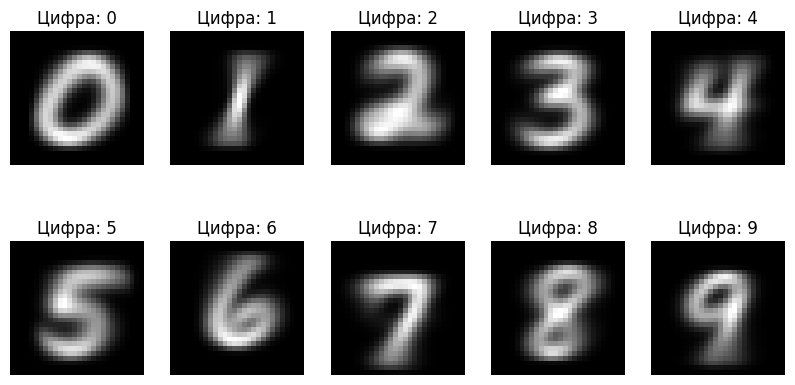

In [9]:
import matplotlib.pyplot as plt

pixel_columns = [col for col in df_train.columns if col != 'label']

average_digits = df_train.groupby('label')[pixel_columns].mean().values

fig, axes = plt.subplots(2, 5, figsize=(10, 5))

for i, ax in enumerate(axes.flat):
    ax.imshow(average_digits[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Цифра: {i}")
    ax.axis('off')

plt.show()

In [10]:
x_train_flat = x_train.reshape(-1, 28*28)
x_test_flat = x_test.reshape(-1, 28*28)

print("Новая форма x_train:", x_train_flat.shape)
print("Новая форма x_test:", x_test_flat.shape)

Новая форма x_train: (60000, 784)
Новая форма x_test: (10000, 784)


In [11]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(x_train_flat, y_train)

y_pred = knn.predict(x_test_flat)

print("Первые 10 предсказанных меток:", y_pred[:10])

Первые 10 предсказанных меток: [7 2 1 0 4 1 4 9 5 9]


Точность модели: 97.05%


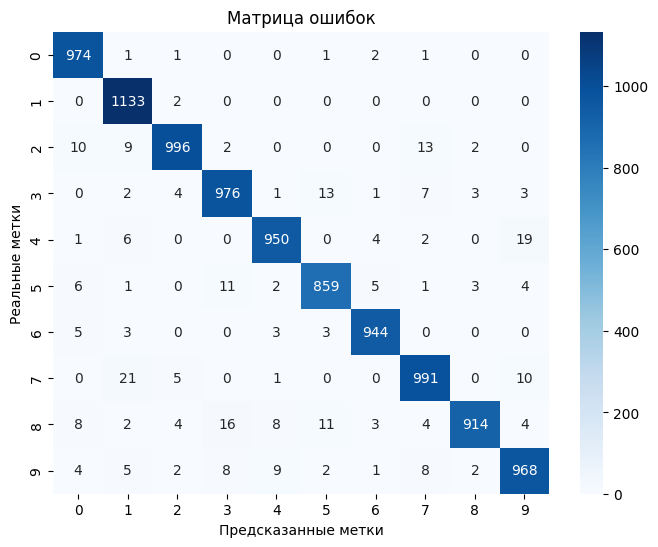

Отчёт по классификации:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.96      1.00      0.98      1135
           2       0.98      0.97      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.96      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy * 100:.2f}%")

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.title("Матрица ошибок")
plt.xlabel("Предсказанные метки")
plt.ylabel("Реальные метки")
plt.show()

report = classification_report(y_test, y_pred)
print("Отчёт по классификации:\n", report)

In [13]:
from tensorflow.keras.utils import to_categorical

x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

print("Форма x_train_norm:", x_train_norm.shape)
print("Форма y_train_cat:", y_train_cat.shape)

Форма x_train_norm: (60000, 28, 28)
Форма y_train_cat: (60000, 10)


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train_norm, y_train_cat, epochs=5, validation_split=0.1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8698 - loss: 0.4567 - val_accuracy: 0.9602 - val_loss: 0.1321
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9621 - loss: 0.1298 - val_accuracy: 0.9728 - val_loss: 0.0932
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9759 - loss: 0.0823 - val_accuracy: 0.9718 - val_loss: 0.0862
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9808 - loss: 0.0628 - val_accuracy: 0.9767 - val_loss: 0.0788
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9871 - loss: 0.0451 - val_accuracy: 0.9808 - val_loss: 0.0689


In [15]:
test_loss, test_acc = model.evaluate(x_test_norm, y_test_cat)

print('Точность нейронной сети на тестовой выборке:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9745 - loss: 0.0797
Точность нейронной сети на тестовой выборке: 0.9775000214576721


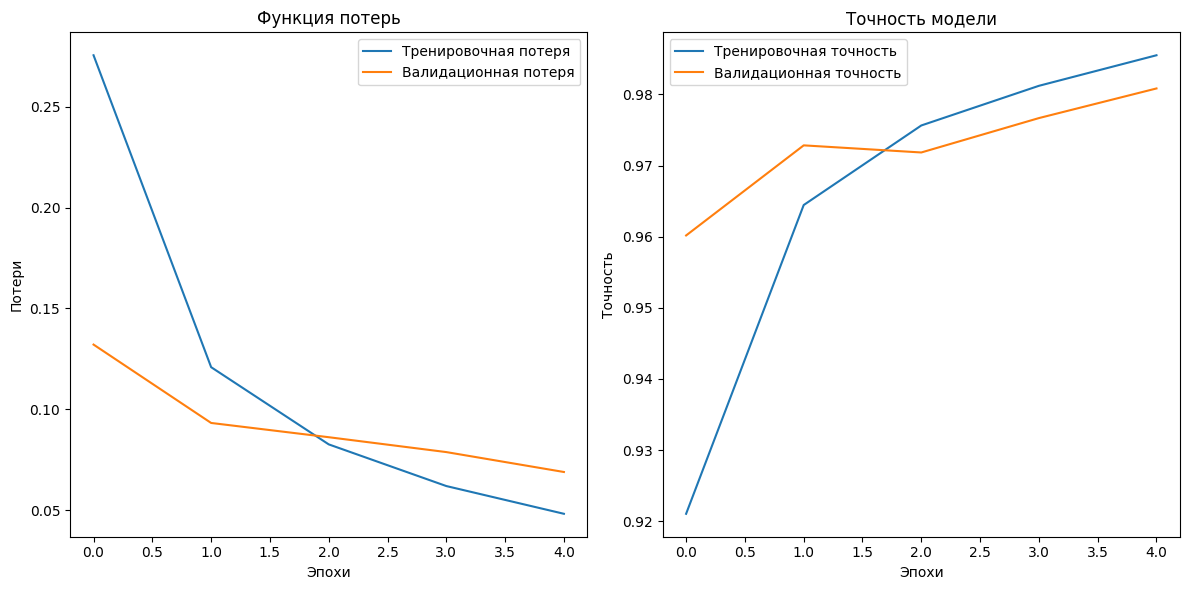

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Тренировочная потеря')
plt.plot(history.history['val_loss'], label='Валидационная потеря')
plt.title('Функция потерь')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Тренировочная точность')
plt.plot(history.history['val_accuracy'], label='Валидационная точность')
plt.title('Точность модели')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()

plt.tight_layout()
plt.show()

In [17]:
knn_acc = accuracy_score(y_test, y_pred)
print(f'Точность модели KNN на тестовой выборке: {knn_acc:.4f}')

conf_matrix_knn = confusion_matrix(y_test, y_pred)
print('Матрица ошибок для модели KNN:')
print(conf_matrix_knn)

class_report_knn = classification_report(y_test, y_pred)
print('Отчёт по классификации для модели KNN:')
print(class_report_knn)

Точность модели KNN на тестовой выборке: 0.9705
Матрица ошибок для модели KNN:
[[ 974    1    1    0    0    1    2    1    0    0]
 [   0 1133    2    0    0    0    0    0    0    0]
 [  10    9  996    2    0    0    0   13    2    0]
 [   0    2    4  976    1   13    1    7    3    3]
 [   1    6    0    0  950    0    4    2    0   19]
 [   6    1    0   11    2  859    5    1    3    4]
 [   5    3    0    0    3    3  944    0    0    0]
 [   0   21    5    0    1    0    0  991    0   10]
 [   8    2    4   16    8   11    3    4  914    4]
 [   4    5    2    8    9    2    1    8    2  968]]
Отчёт по классификации для модели KNN:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.96      1.00      0.98      1135
           2       0.98      0.97      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.97   

In [18]:
test_loss, test_acc = model.evaluate(x_test_norm, y_test_cat)
print('Точность нейронной сети на тестовой выборке:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9745 - loss: 0.0797
Точность нейронной сети на тестовой выборке: 0.9775000214576721


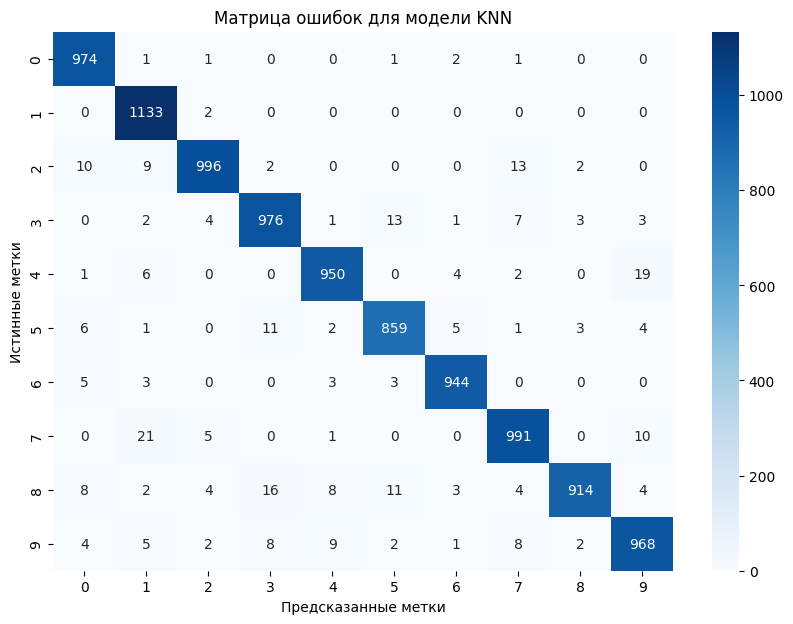

In [19]:
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Матрица ошибок для модели KNN')
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


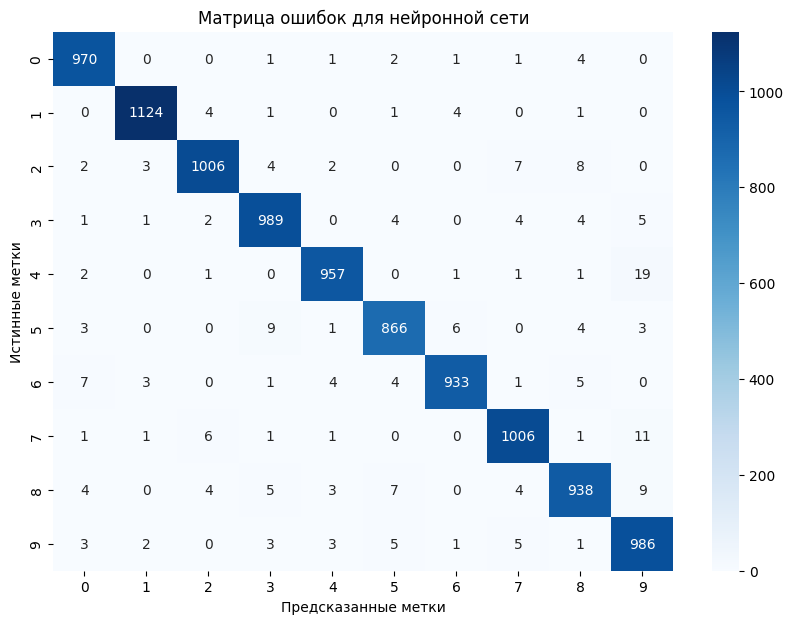

In [20]:
y_pred_nn = model.predict(x_test_norm)
y_pred_nn_classes = y_pred_nn.argmax(axis=1)

conf_matrix_nn = confusion_matrix(y_test, y_pred_nn_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_nn, annot=True, fmt="d", cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Матрица ошибок для нейронной сети')
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.show()

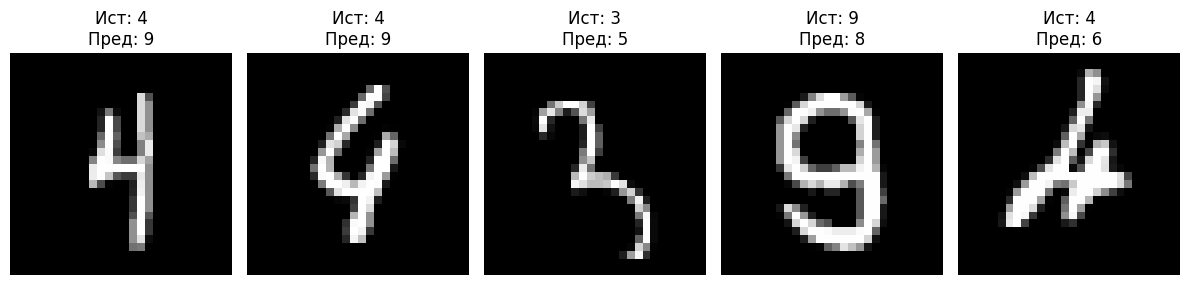

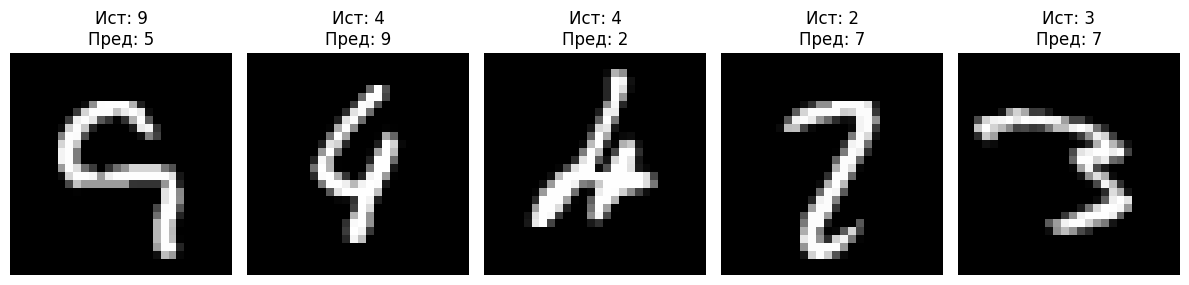

In [22]:
wrong_knn = np.where(y_pred != y_test)[0]
plt.figure(figsize=(12, 6))
for i, idx in enumerate(wrong_knn[:5]):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[idx], cmap='gray')
    plt.axis('off')
    plt.title(f"Ист: {y_test[idx]}\nПред: {y_pred[idx]}", fontsize=12)

plt.tight_layout()
plt.show()

wrong_nn = np.where(y_pred_nn_classes != y_test)[0]
plt.figure(figsize=(12, 6))
for i, idx in enumerate(wrong_nn[:5]):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[idx], cmap='gray')
    plt.axis('off')
    plt.title(f"Ист: {y_test[idx]}\nПред: {y_pred_nn_classes[idx]}", fontsize=12)

plt.tight_layout()
plt.show()